In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import pickle

In [6]:
with open('data/seq_202_lidar.pkl','rb') as _fd:
    obj = pickle.load(_fd)

In [7]:
type(obj)

numpy.ndarray

In [8]:
obj.shape

(50035, 6)

In [9]:
import pandas as pd

In [83]:
df = pd.DataFrame(obj).rename(columns=dict(zip(list(range(3)),'xyz')))

In [11]:
from matplotlib import pylab as plt

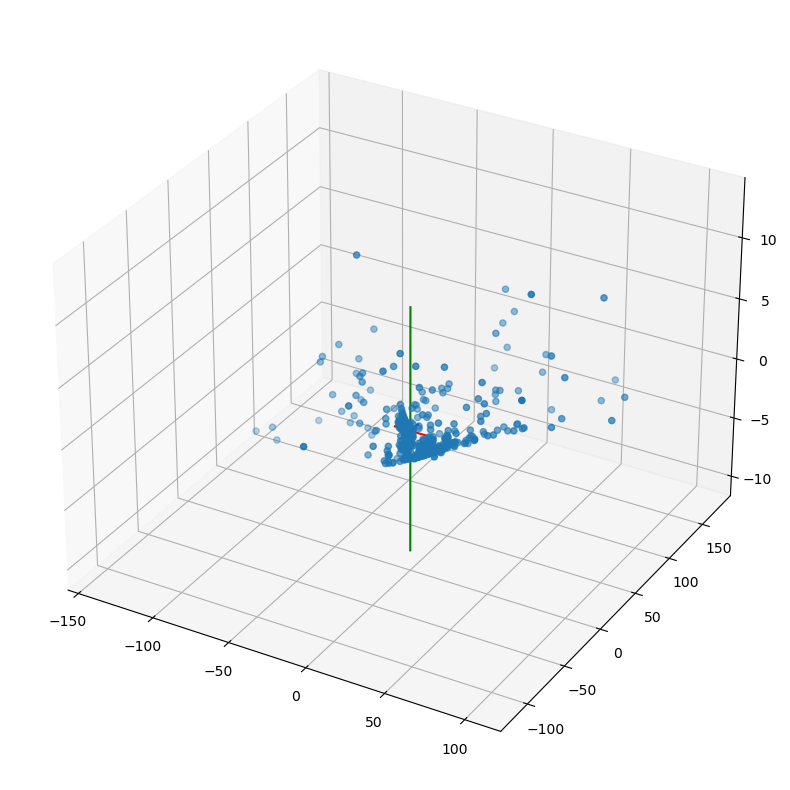

In [29]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': '3d'})
ax.scatter(*df.iloc[::100][['x','y','z']].values.T)
ax.plot([0,0],[0,0],[-10,10],color='green')
ax.plot([-10,10],[0,0],[0,0],color='red')
ax.plot([0,0],[-10,10],[0,0],color='blue')

In [17]:
X,Y,Z = df[['x','y','z']].values.T

In [30]:
with open('src/data_unpack/config/lidar_cam_calib.txt', 'r', encoding='utf8') as _fd:
    conf = _fd.readlines()

In [37]:
from io import BytesIO

In [53]:
with BytesIO() as _fd:
    _fd.write(conf[-1].split(':')[-1].encode('utf8'))
    _fd.seek(0)
    _df = pd.read_csv(_fd, sep=' ', header=None, encoding='utf8')
    Mtr = np.asmatrix(_df.T[0].dropna().values.reshape(3,4))

In [66]:
Mtr

matrix([[-0.0361133 , -0.99835228,  0.04459329,  0.07      ],
        [-0.02594949, -0.04367056, -0.99870892, -0.25      ],
        [ 0.99901074, -0.03722384, -0.02432964, -0.4       ]])

In [101]:
Xc,Yc,Zc = np.asarray(np.vstack([X,Y,Z]).T @ Mtr[:,:-1] - np.asarray(Mtr[:,-1]).reshape(-1)).T

In [102]:
Xc

array([-2.67947914, -0.57786515, -3.07515606, ..., -4.6572823 ,
       -3.01830404, -2.02436311])

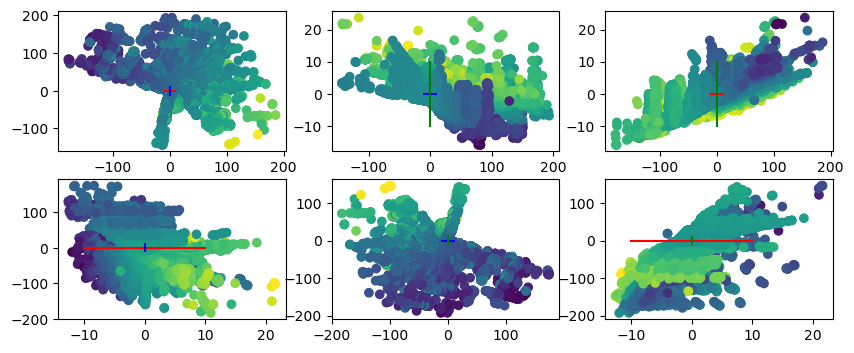

In [103]:
fig, ((ax11,ax12,ax13),(ax21,ax22,ax23)) = plt.subplots(2,3,figsize=(10,4))
ax11.scatter(X,Y,c=Z)
ax11.plot([-10,10],[0,0],color='red')
ax11.plot([0,0],[-10,10],color='blue')

ax12.scatter(Y,Z,c=X)
ax12.plot([-10,10],[0,0],color='blue')
ax12.plot([0,0],[-10,10],color='green')

ax13.scatter(X,Z,c=Y)
ax13.plot([-10,10],[0,0],color='red')
ax13.plot([0,0],[-10,10],color='green')

ax21.scatter(Xc,Yc,c=Zc)
ax21.plot([-10,10],[0,0],color='red')
ax21.plot([0,0],[-10,10],color='blue')

ax22.scatter(Yc,Zc,c=Xc)
ax22.plot([-10,10],[0,0],color='blue')
ax22.plot([0,0],[-10,10],color='green')

ax23.scatter(Xc,Zc,c=Yc)
ax23.plot([-10,10],[0,0],color='red')
ax23.plot([0,0],[-10,10],color='green')


In [75]:
W,H = 800,600

In [86]:
F = 1.

In [129]:
xs = Zc*(F/Xc)
ys = Yc*(F/Xc)

In [130]:
mask = (Xc>=0)*(xs>=(-(W//2)))*(xs<W//2)*(ys>(-(H//2)))*(ys<H//2)

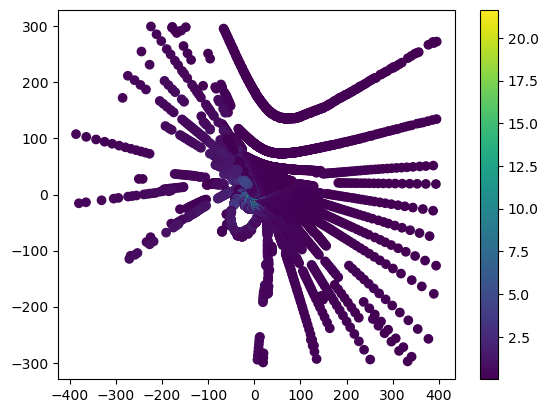

In [134]:
plt.scatter(xs[mask],ys[mask],c=Xc[mask])
plt.colorbar()

In [185]:
imgZ = np.zeros((H,W), np.uint8)
imgX = np.zeros((H,W), np.uint8)
imgY = np.zeros((H,W), np.uint8)

In [189]:
ixs = (xs[mask]+H//2).astype(np.int16)
iys = (ys[mask]+H//2).astype(np.int16)
icZs = (Xc[mask] / np.max(Xc[mask]) * 255).astype(np.uint8) +100
icXs = (Zc[mask] / np.max(Zc[mask]) * 255).astype(np.uint8) +100
icYs = (Yc[mask] / np.max(Yc[mask]) * 255).astype(np.uint8) +100

In [190]:
imgZ[iys, ixs] = icZs
imgX[iys, ixs] = icXs
imgY[iys, ixs] = icYs

True

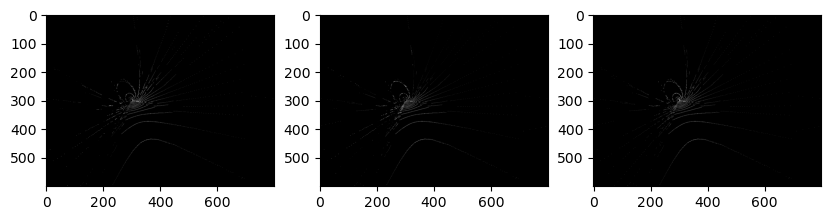

In [192]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,4))
ax1.imshow(imgX, cmap='gray')
ax2.imshow(imgY, cmap='gray')
ax3.imshow(imgZ, cmap='gray')
cv2.imwrite('/tmp/imgX.png', imgX)
cv2.imwrite('/tmp/imgY.png', imgY)
cv2.imwrite('/tmp/imgZ.png', imgZ)

(array([1.5000e+01, 2.8700e+02, 9.4000e+02, 1.2010e+03, 2.7472e+04,
        1.8051e+04, 1.3530e+03, 6.0800e+02, 8.0000e+01, 2.8000e+01]),
 array([-178.19525146, -141.8034668 , -105.41168213,  -69.01990509,
         -32.62812042,    3.76366425,   40.15544891,   76.54723358,
         112.93901062,  149.33079529,  185.72257996]),
 <BarContainer object of 10 artists>)

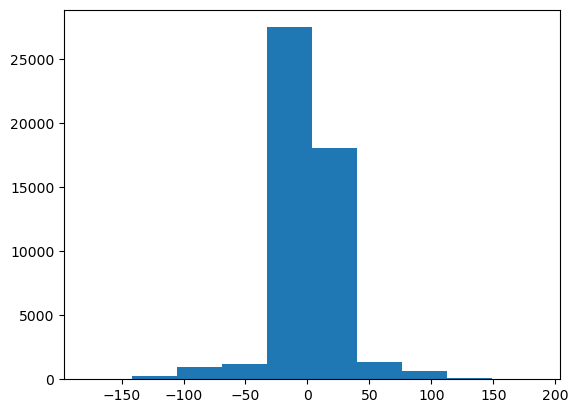

In [193]:
plt.hist(X)

(array([2.7000e+01, 1.1800e+02, 3.4700e+02, 7.3890e+03, 3.4525e+04,
        4.2350e+03, 2.0260e+03, 7.0700e+02, 4.8800e+02, 1.7300e+02]),
 array([-143.49316406, -109.77948761,  -76.06581116,  -42.3521347 ,
          -8.63845825,   25.0752182 ,   58.78889465,   92.50257111,
         126.21624756,  159.92993164,  193.64360046]),
 <BarContainer object of 10 artists>)

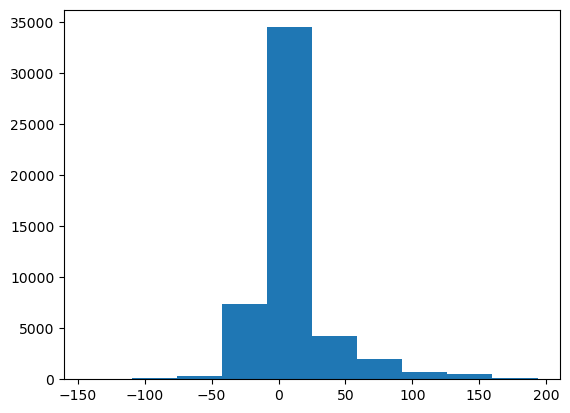

In [194]:
plt.hist(Y)

(array([6.6000e+01, 2.0400e+02, 1.7840e+03, 3.1251e+04, 1.4506e+04,
        1.6010e+03, 4.7700e+02, 1.2100e+02, 1.0000e+01, 1.5000e+01]),
 array([-15.86379528, -11.90652084,  -7.94924593,  -3.99197102,
         -0.03469639,   3.92257833,   7.87985325,  11.83712769,
         15.79440212,  19.75167656,  23.70895195]),
 <BarContainer object of 10 artists>)

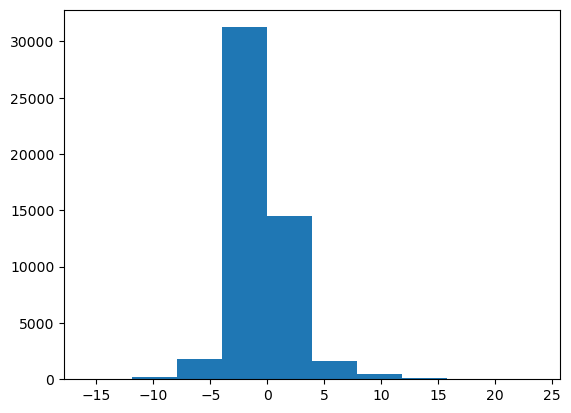

In [195]:
plt.hist(Z)

In [197]:
with open('data/lidar_202_to_rgb_[286].pkl','rb') as _fd:
    obj2 = pickle.load(_fd)

In [198]:
type(obj2)

dict

In [199]:
list(obj2.keys())

['camera_coordinates', '3d_points']

In [212]:
Zc,Xc,Yc = obj2['camera_coordinates'].T

In [225]:
X,Y,Z = obj2['3d_points'].T

(array([31207.,  1818.,   706.,   458.,   400.,   354.,   450.,   592.,
         1309., 12741.]),
 array([    0. ,  6553.5, 13107. , 19660.5, 26214. , 32767.5, 39321. ,
        45874.5, 52428. , 58981.5, 65535. ]),
 <BarContainer object of 10 artists>)

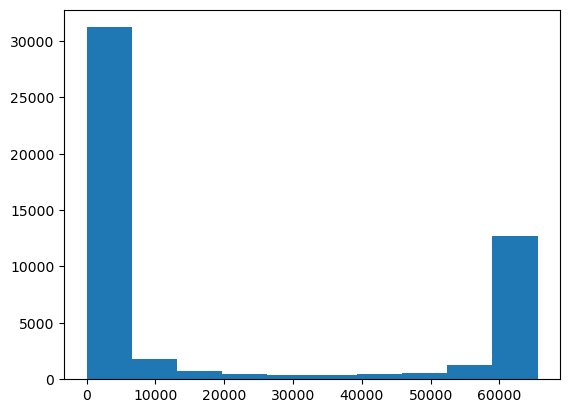

In [214]:
plt.hist(Xc)

(array([44516.,   276.,   104.,    61.,    55.,    56.,    57.,   112.,
          196.,  4602.]),
 array([    0. ,  6553.5, 13107. , 19660.5, 26214. , 32767.5, 39321. ,
        45874.5, 52428. , 58981.5, 65535. ]),
 <BarContainer object of 10 artists>)

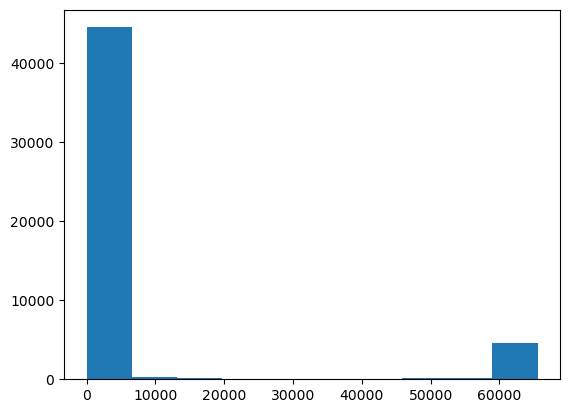

In [215]:
plt.hist(Yc)

(array([40151.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9884.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

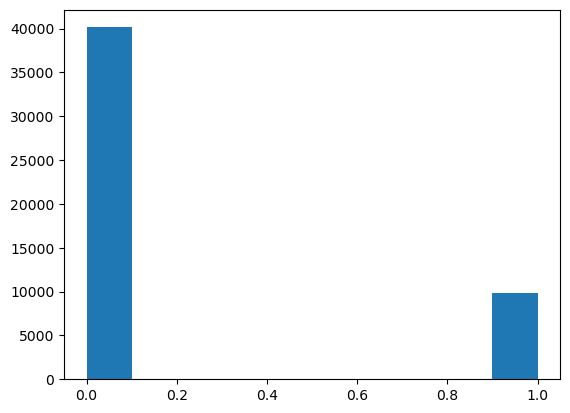

In [216]:
plt.hist(Zc)

In [317]:
W,H = 1920,1080

In [320]:
mask = (Zc>0)*(Xc>=0)*(Xc<W)*(Yc>=0)*(Yc<H)

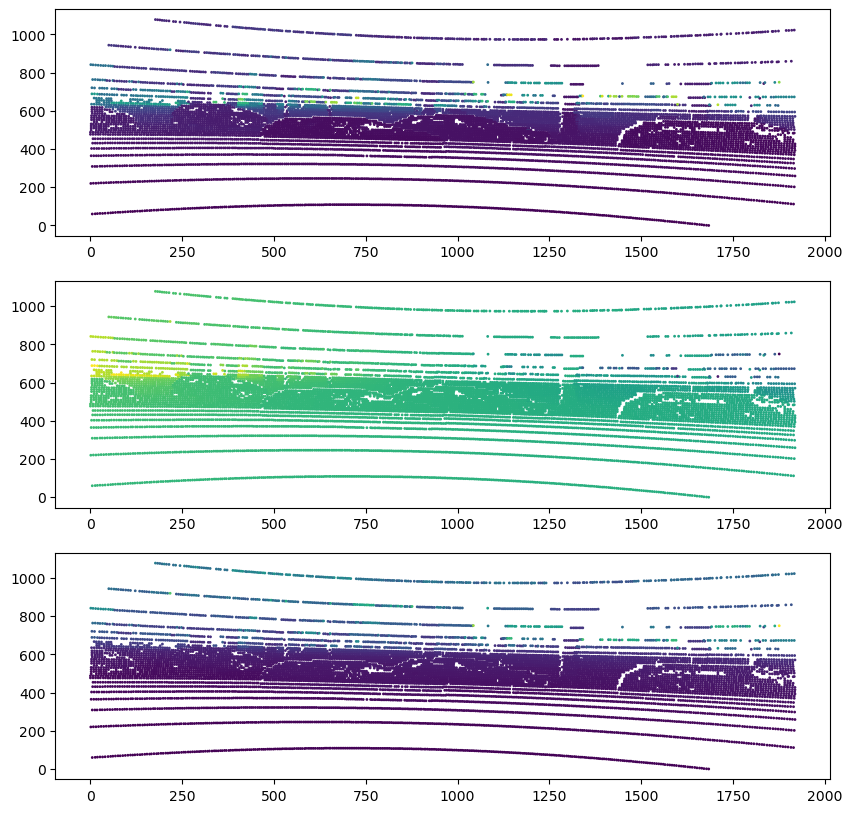

In [321]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
cax1 = ax1.scatter(Xc[mask],np.max(Yc[mask])-Yc[mask],c=X[mask], s=1.)
cax2 = ax2.scatter(Xc[mask],np.max(Yc[mask])-Yc[mask],c=Y[mask], s=1.)
cax3 = ax3.scatter(Xc[mask],np.max(Yc[mask])-Yc[mask],c=Z[mask], s=1.)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91c77607c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91c78d9210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91c7761240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91c7895090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91c7897f70>],
 'means': []}

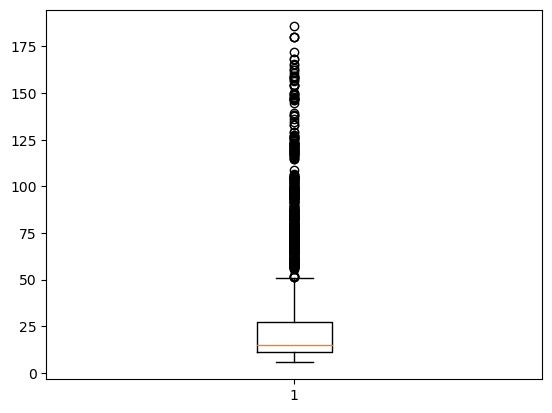

In [260]:
plt.boxplot(X[mask])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91c5dc7ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91c5dc6a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91c5dc7a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91c5dc5d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91c5dc5a50>],
 'means': []}

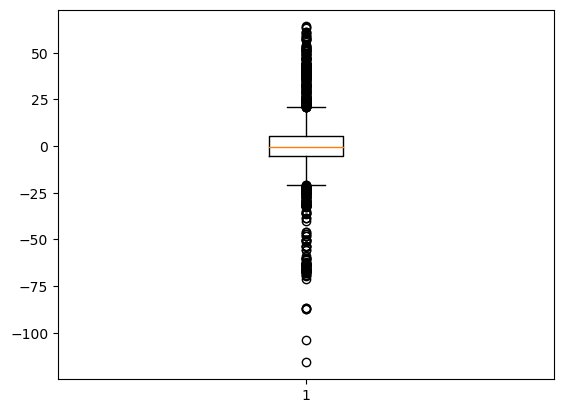

In [261]:
plt.boxplot(Y[mask])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91c3755ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91c3754df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91c3755c00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91c38c16f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91c38c0c70>],
 'means': []}

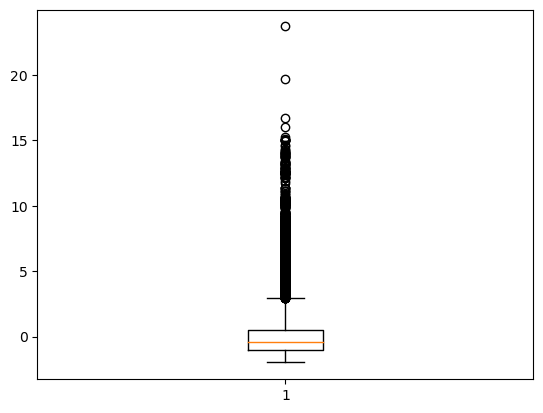

In [262]:
plt.boxplot(Z[mask])

In [242]:
imgX = np.zeros((H,W), np.uint8)
imgY = np.zeros((H,W), np.uint8)
imgZ = np.zeros((H,W), np.uint8)
imgX[Yc[mask],Xc[mask]] = X[mask]
imgY[Yc[mask],Xc[mask]] = Y[mask]
imgZ[Yc[mask],Xc[mask]] = Z[mask]

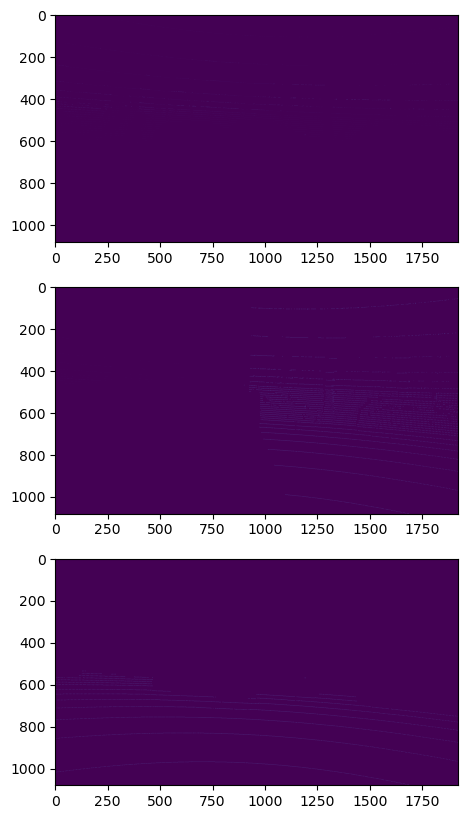

In [244]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
ax1.imshow(imgX)
ax2.imshow(imgY)
ax3.imshow(imgZ)

In [264]:
idx = np.arange(len(X))[mask]

In [267]:
mask_val = (X[mask] < 50.)*(Y[mask] > -25.)*(Y[mask] < 25.)*(Z[mask] < 5)

In [279]:
Xci = Xc[idx[mask_val]]
Yci = Yc[idx[mask_val]]
Ycim = np.max(Yci)-Yci
Xcv = X[idx[mask_val]]
Ycv = Y[idx[mask_val]]
Zcv = Z[idx[mask_val]]

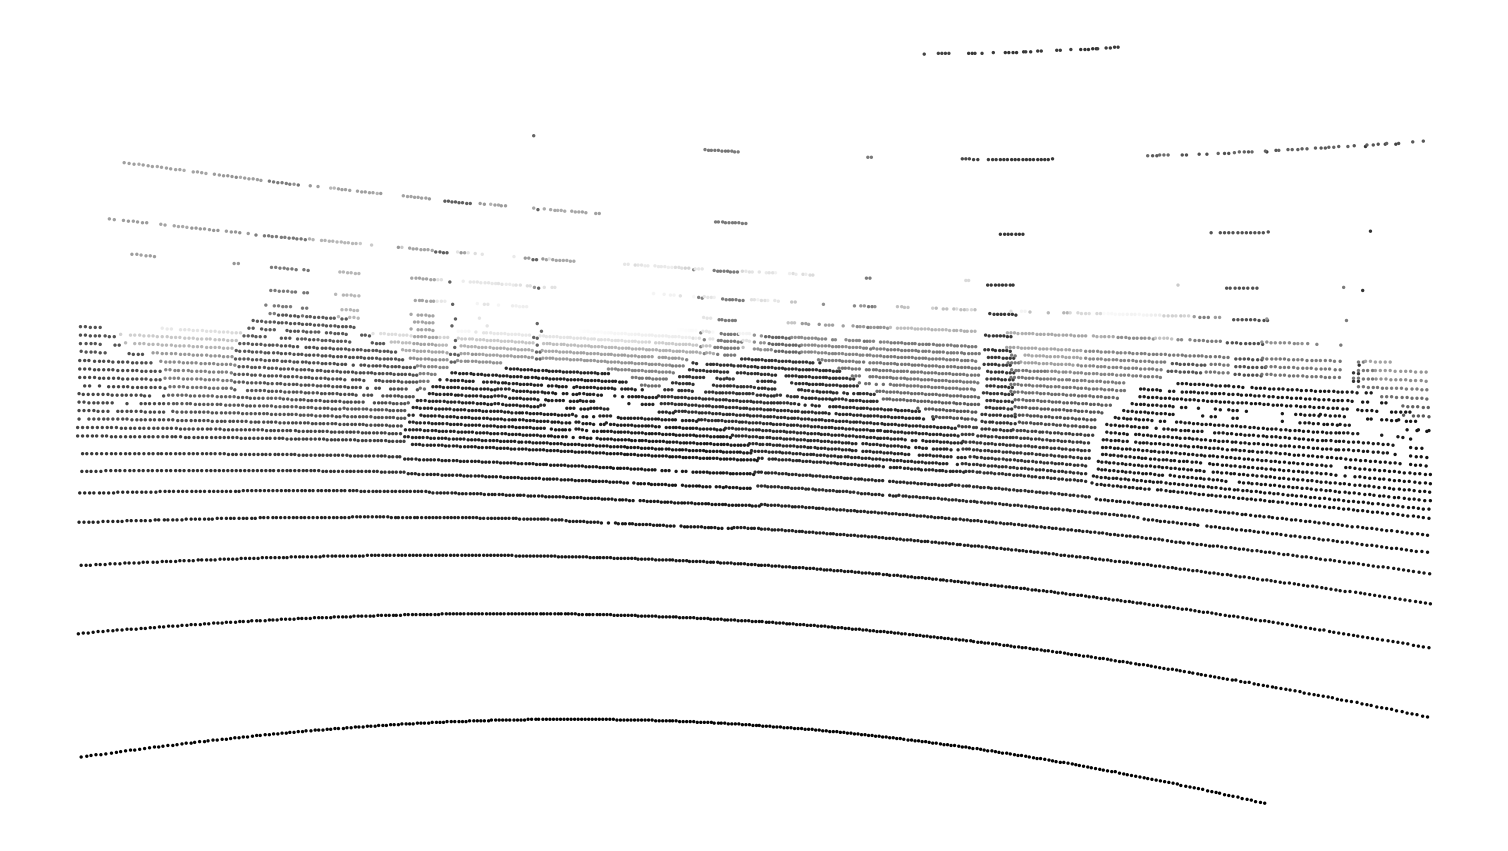

In [326]:
fig, ax1 = plt.subplots(1,1, figsize=(19.2,10.8))
cax1 = ax1.scatter(Xci,Ycim,c=Xcv, s=2, cmap='gray')
#ax1.set_title('Depth')
ax1.axis('off')
plt.savefig('/tmp/depth.png')
plt.show()

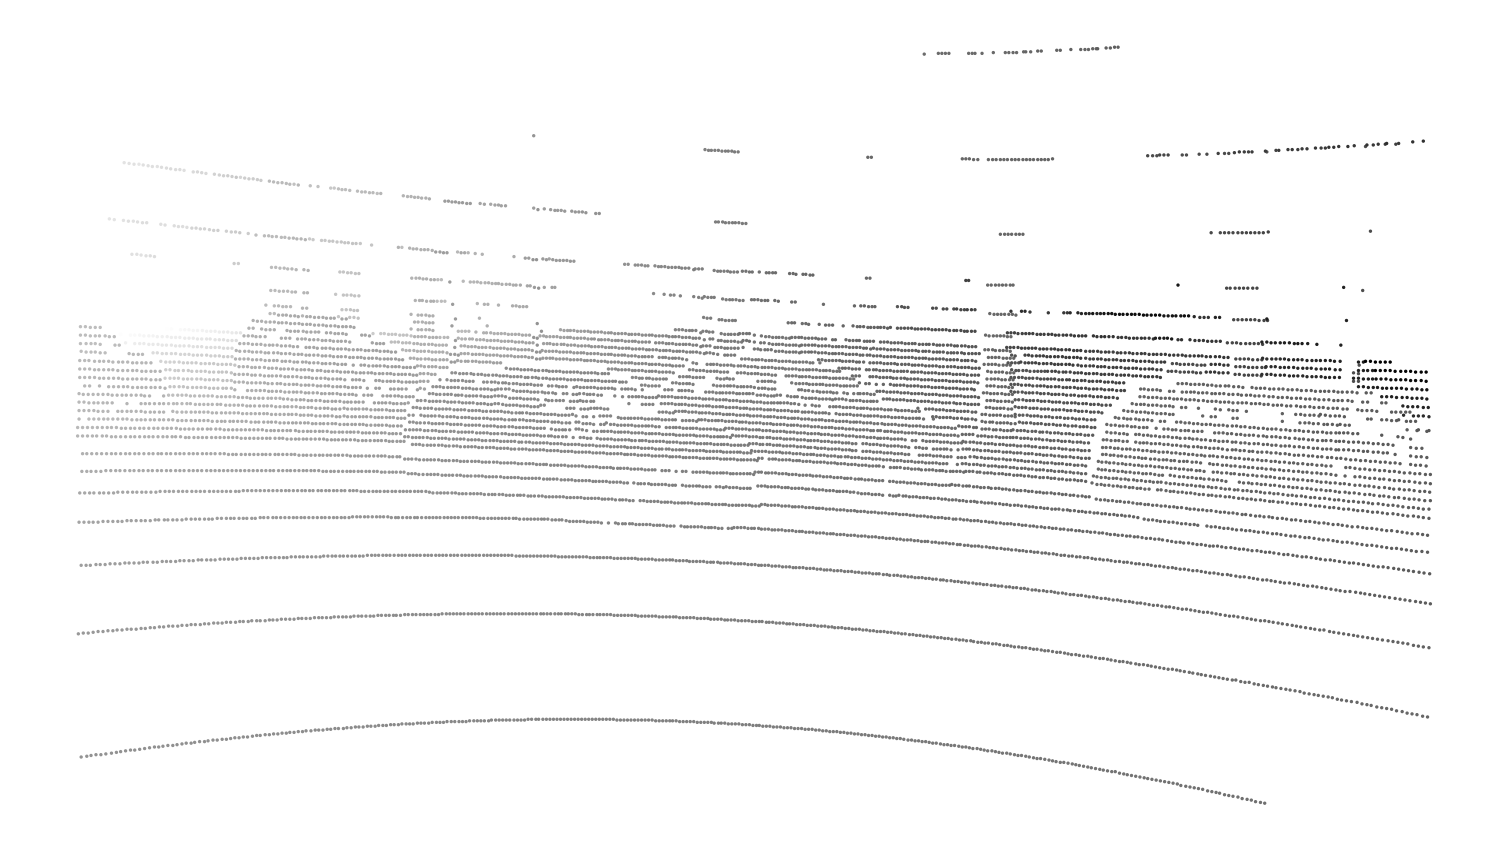

In [328]:
fig, ax1 = plt.subplots(1,1, figsize=(19.2,10.8))
cax1 = ax1.scatter(Xci,Ycim,c=Ycv, s=2., cmap='gray')
#ax1.set_title('Width')
ax1.axis('off')
plt.savefig('/tmp/width.png')
plt.show()

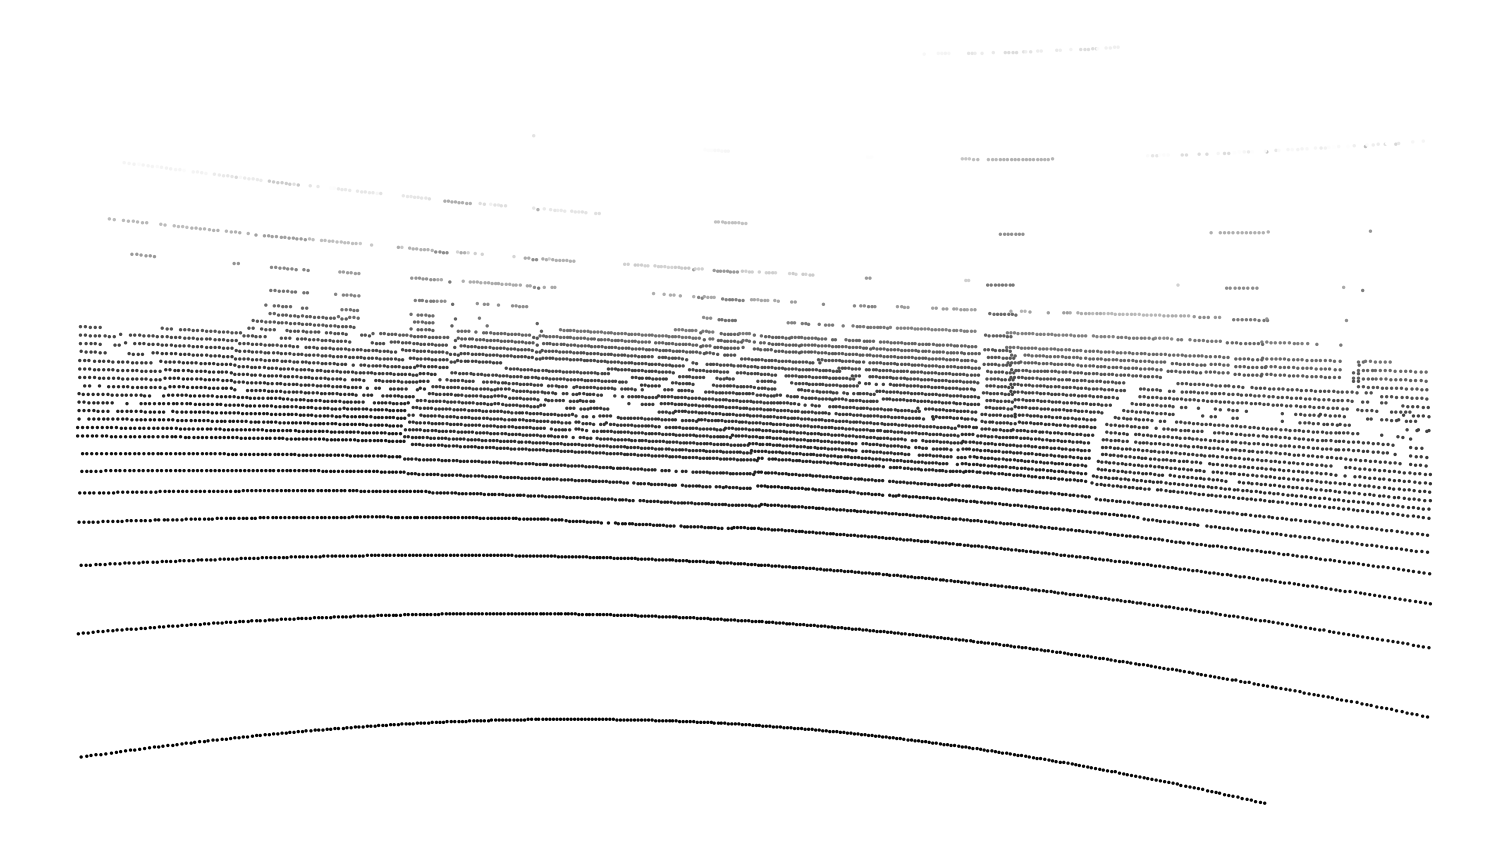

In [330]:
fig, ax1 = plt.subplots(1,1, figsize=(19.2,10.8))
cax1 = ax1.scatter(Xci,Ycim,c=Zcv, s=2., cmap='gray')
#ax1.set_title('Height')
ax1.axis('off')
plt.savefig('/tmp/height.png')
plt.show()

In [294]:
img_depth = np.zeros((H,W), np.uint8)
img_width = np.zeros((H,W), np.uint8)
img_height = np.zeros((H,W), np.uint8)
img_depth[Yci,Xci] = (Xcv / np.max(Xcv) * 255).astype(np.uint8) + 80
img_width[Yci,Xci] = (Ycv / np.max(Ycv) * 255).astype(np.uint8)
img_height[Yci,Xci] = (Zcv / np.max(Zcv) * 255).astype(np.uint8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91b7525de0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91b7526320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91b7525b40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91b7526860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91b7526b00>],
 'means': []}

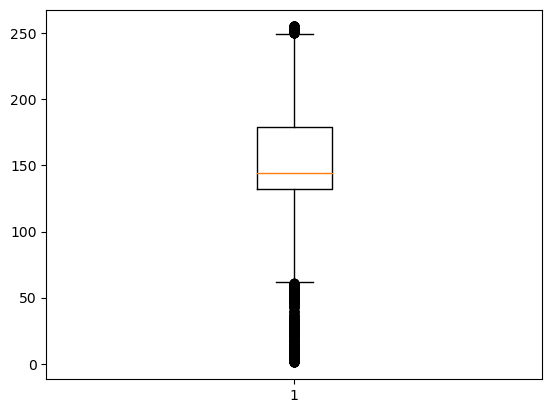

In [295]:
plt.boxplot(img_depth[img_depth > 0].reshape(-1))

In [375]:
import matplotlib
import matplotlib.cm as cm

True

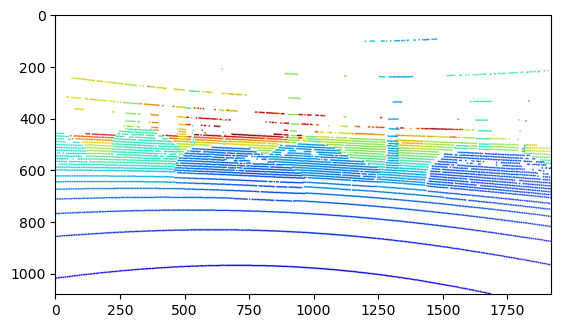

In [409]:
#minima = min(Xcv)
#maxima = max(Xcv)

#norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)

blues = plt.get_cmap('jet')

imgX = np.ones((H,W,3), np.uint8)*255
for x,y,c in np.vstack([Xci,Yci,Xcv]).T:
#    print(mapper.to_rgba(c*5))
    cv2.circle(imgX, (int(x),int(y)), 3, 225*np.asarray(blues(c/np.max(Xcv)))[:-1], -1)
plt.imshow(imgX)
cv2.imwrite('/tmp/depth-001.png', imgX)

True

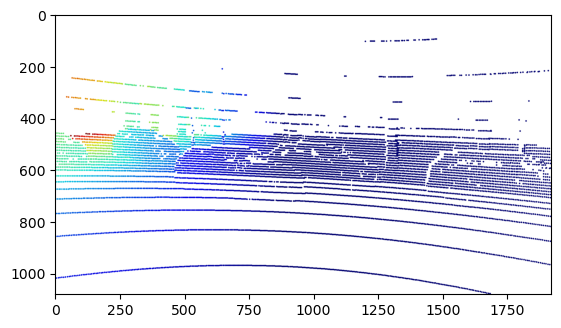

In [410]:
blues = plt.get_cmap('jet')
imgY = np.ones((H,W,3), np.uint8)*255
for x,y,c in np.vstack([Xci,Yci,Ycv]).T:
    cv2.circle(imgY, (int(x),int(y)), 3, 225*np.asarray(blues(c/np.max(Ycv)))[:-1], -1)
plt.imshow(imgY, cmap='gray')
cv2.imwrite('/tmp/width-001.png', imgY)

True

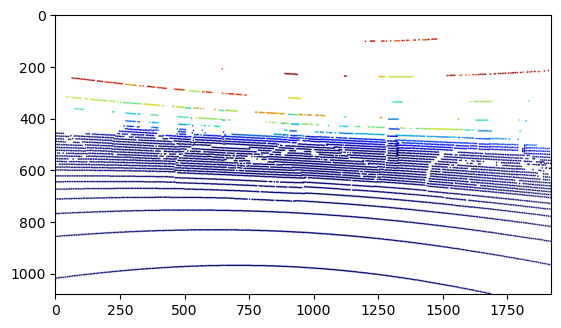

In [411]:
blues = plt.get_cmap('jet')
imgZ = np.ones((H,W,3), np.uint8)*255
for x,y,c in np.vstack([Xci,Yci,Zcv]).T:
    cv2.circle(imgZ, (int(x),int(y)), 3, 225*np.asarray(blues(c/np.max(Zcv)))[:-1], -1)
plt.imshow(imgZ, cmap='gray')
cv2.imwrite('/tmp/height-001.png', imgZ)